
'Date' column after conversion:
0   2018-01-01
1   2018-01-01
2   2018-01-01
3          NaT
4   2018-01-01
Name: Date, dtype: datetime64[ns]

Sample of date-related columns:
        Date  year  month day_of_week  is_weekend
0 2018-01-01  2018      1      Monday           0
1 2018-01-01  2018      1      Monday           0
2 2018-01-01  2018      1      Monday           0
4 2018-01-01  2018      1      Monday           0
5 2018-01-01  2018      1      Monday           0

Final dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 9153 entries, 0 to 10838
Data columns (total 30 columns):
 #   Column                                                                       Non-Null Count  Dtype         
---  ------                                                                       --------------  -----         
 0   Date                                                                         9153 non-null   datetime64[ns]
 1   service                                                  

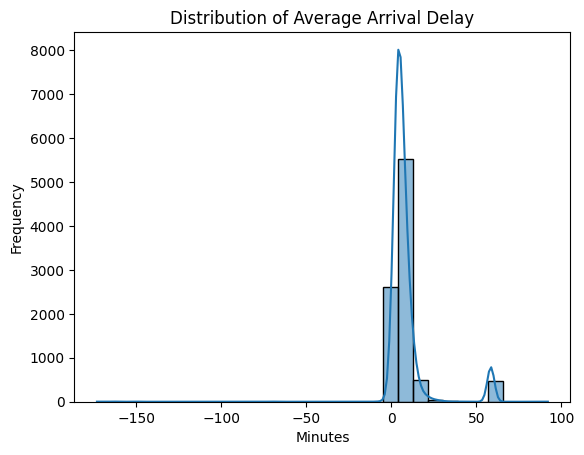


Showing boxplot of delays by arrival station (Top 30)...


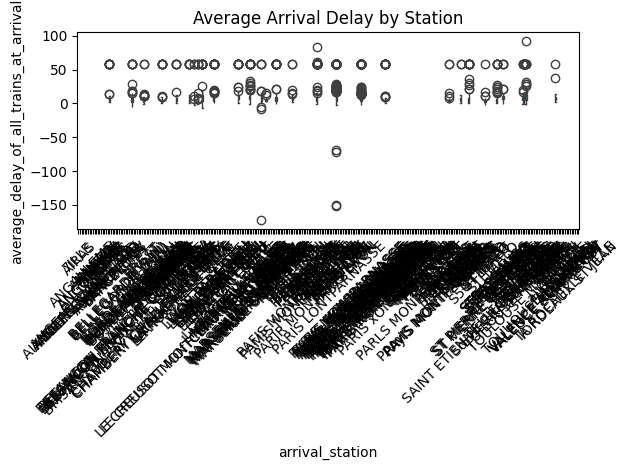


 Featured dataset saved as 'featured_dataset.csv'.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("dataset.csv", sep=";", na_values=["N/A", ""])

# Standardize column names
df.columns = (
    df.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(">", "gt")
    .str.replace("(", "")
    .str.replace(")", "")
    .str.replace(";", "_")
)

# Rename column if necessary
if "date" in df.columns:
    df.rename(columns={"date": "Date"}, inplace=True)

# Clean and convert the 'Date' column
df["Date"] = df["Date"].astype(str).str.replace(r"[^\d\-]", "", regex=True)
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m", errors="coerce")

print("\n'Date' column after conversion:")
print(df["Date"].head())

# Drop rows with invalid dates
df = df.dropna(subset=["Date"])

# Create new time-based features
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day_of_week"] = df["Date"].dt.day_name()
df["is_weekend"] = (df["Date"].dt.weekday >= 5).astype(int)

print("\nSample of date-related columns:")
print(df[["Date", "year", "month", "day_of_week", "is_weekend"]].head())

# Drop duplicates and rows with missing delay values
df = df.drop_duplicates()
df = df.dropna(subset=["average_delay_of_all_trains_at_arrival"])

# Convert station columns to category type
df["departure_station"] = df["departure_station"].astype("category")
df["arrival_station"] = df["arrival_station"].astype("category")

print("\nFinal dataset info:")
print(df.info())

print("\nMissing values per column after cleaning:")
print(df.isnull().sum())

# Save the cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_dataset.csv'.")

# Plot: Histogram of average arrival delays
print("\nShowing histogram of average arrival delays...")
sns.histplot(df["average_delay_of_all_trains_at_arrival"], bins=30, kde=True)
plt.title("Distribution of Average Arrival Delay")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

# Plot: Boxplot of average arrival delay per station (Top 30)
print("\nShowing boxplot of delays by arrival station (Top 30)...")
top_arrivals = df["arrival_station"].value_counts().head(30).index
sns.boxplot(
    data=df[df["arrival_station"].isin(top_arrivals)],
    x="arrival_station",
    y="average_delay_of_all_trains_at_arrival"
)
plt.xticks(rotation=45)
plt.title("Average Arrival Delay by Station")
plt.tight_layout()
plt.show()

# Save the final dataset with features
df.to_csv("featured_dataset.csv", index=False)
print("\n Featured dataset saved as 'featured_dataset.csv'.")